## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

## Load Data

In [2]:
# Load from csv
df = pd.read_csv('./cleaned_fake_job_postings.csv')

# Set index to job_id
df.set_index("job_id", inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,False,True,False,Other,Junior,NaN,Business,False,marketing intern we're food52 we've created gr...
2,False,True,False,Full-time,NaN,NaN,Business,False,customer service cloud video production 90 se...
3,False,True,False,NaN,NaN,NaN,NaN,False,commissioning machinery assistant cma valor se...
4,False,True,False,Full-time,Standard,Undergraduate,Business,False,account executive washington dc passion impro...
5,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False,bill review manager spotsource solution llc gl...


In [3]:
# Split data into real and fake
real_data = df.loc[df["fraudulent"] == False,]
fake_data = df.loc[df["fraudulent"] == True,]

## Binary Variables Analysis

In [4]:
# Helper function to clean labels for plots
def clean_label_name(text):
    return text.replace("_", " ").title()

In [5]:
# Get proportion of fake posts in dataset
print("Percent of fradulent data in the dataset: ", round(fake_data.shape[0] / df.shape[0], 3)*100, "%")

Percent of fradulent data in the dataset:  4.8 %


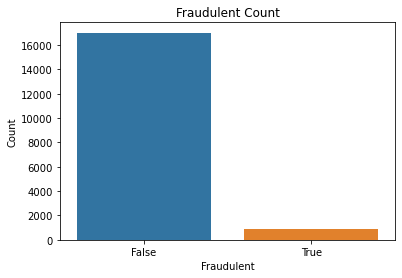

In [6]:
# Create Count Plot to see proportion of fradulent posts
col = "fraudulent"
clean_label = clean_label_name(col)
ax = sns.countplot(x=col, data=df)
ax.set(xlabel=clean_label, ylabel='Count', title=f'{clean_label} Count')
plt.show()

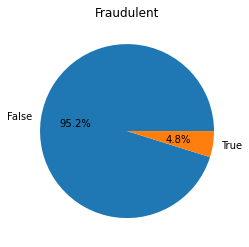

In [41]:
# Plot pie chart to see proportion of fraudulent posts
fraudulent_value_count = df["fraudulent"].value_counts()
plt.pie(fraudulent_value_count, labels=fraudulent_value_count.index, autopct="%.1f%%")
plt.title(clean_label_name("fraudulent"))
plt.show()

Index([False, True], dtype='object')

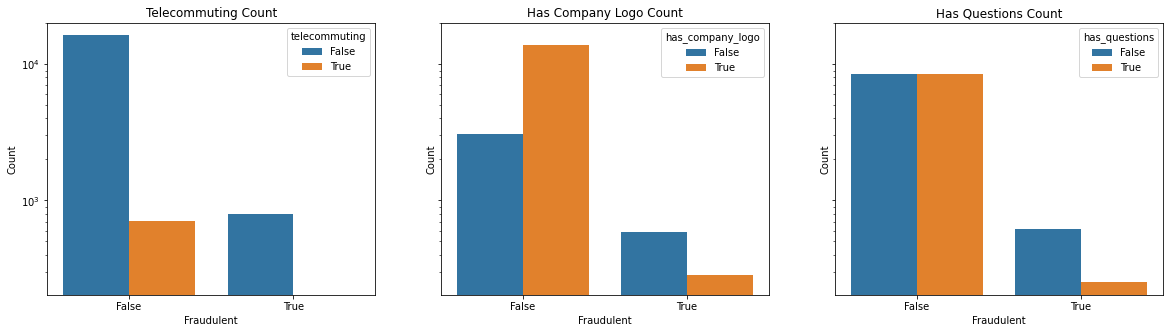

In [8]:
# For each binary column create a Count Plot grouped on whether it is fraudulent 
binary_columns = ["telecommuting", "has_company_logo", "has_questions"]
f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
for i in range(len(binary_columns)):
    col = binary_columns[i]
    ax = axes[i]
    ax = sns.countplot(x="fraudulent", hue=col, data=df, ax=ax)
    ax.set(xlabel=clean_label_name("fraudulent"), ylabel='Count', title=f'{clean_label_name(col)} Count', yscale="log")
plt.show()

## Categorical Variable Analysis

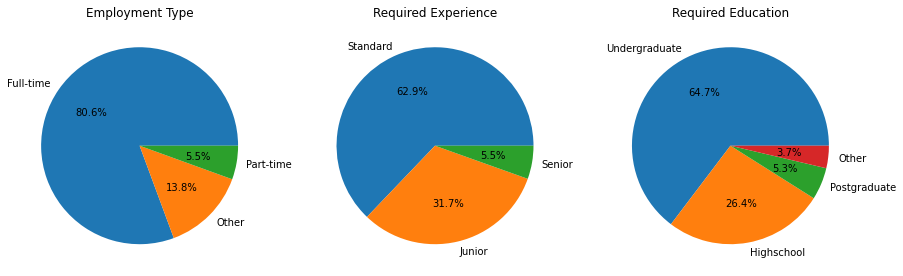

In [58]:
categorical_columns = ["employment_type", "required_experience", "required_education"]
fig, axs = plt.subplots(1, 3, figsize=(15,15))

for i in range(3):
    col = categorical_columns[i]
    col_value_counts = df[col].value_counts()
    
    axs[i].pie(col_value_counts, labels=col_value_counts.index, autopct="%.1f%%")
    axs[i].set_title(clean_label_name(col)) 

plt.show()

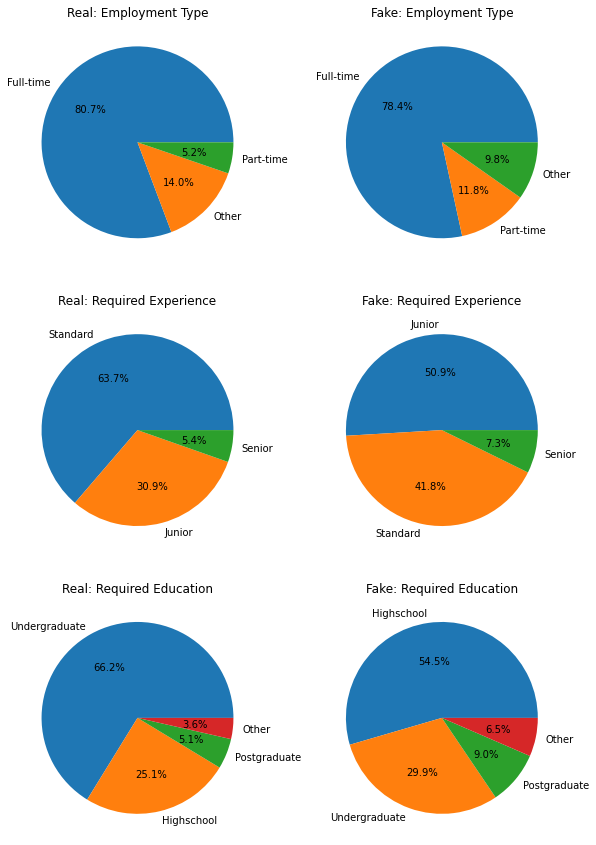

In [55]:
categorical_columns = ["employment_type", "required_experience", "required_education"]
fig, axs = plt.subplots(3, 2, figsize=(10,15))

for i in range(3):
    col = categorical_columns[i]
    real_value_count = real_data[col].value_counts()
    fake_value_count = fake_data[col].value_counts()
    
    axs[i, 0].pie(real_value_count, labels=real_value_count.index, autopct="%.1f%%")
    axs[i, 0].set_title("Real: " + clean_label_name(col)) 
    
    axs[i, 1].pie(fake_value_count, labels=fake_value_count.index, autopct="%.1f%%")
    axs[i, 1].set_title("Fake: " + clean_label_name(col))

plt.show()

## Text Analysis

In [9]:
# Create two strings, one containing all the words in real posts and the other fake posts 
real_text = " ".join(real_data["text"])
fake_text = " ".join(fake_data["text"])

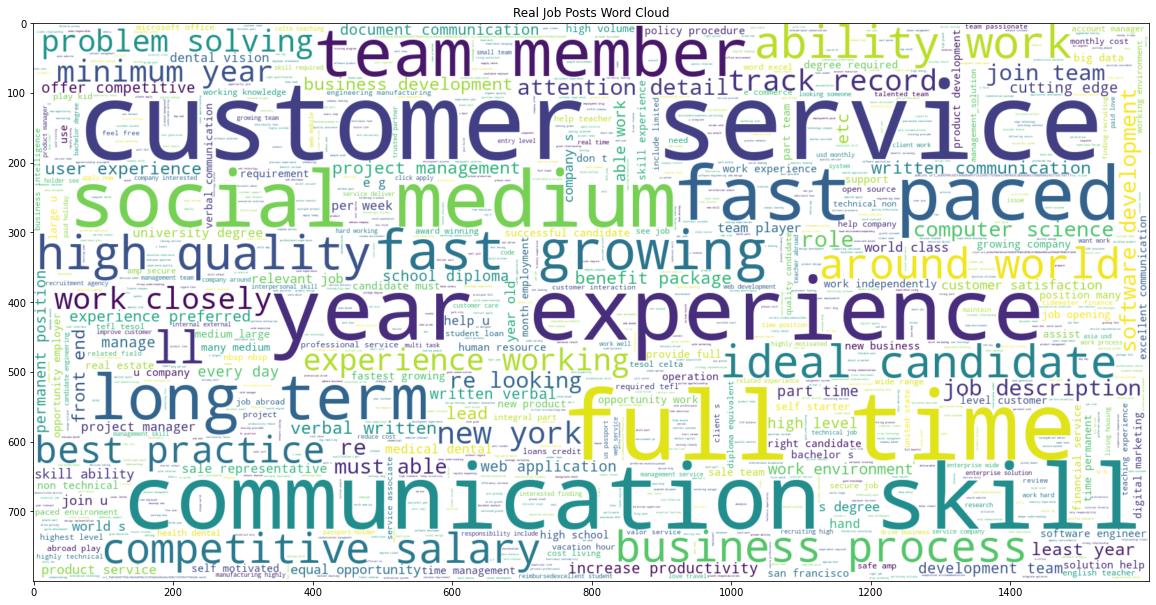

In [59]:
# Create a word cloud of words in real posts
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(real_text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.title("Real Job Posts Word Cloud")
plt.show()

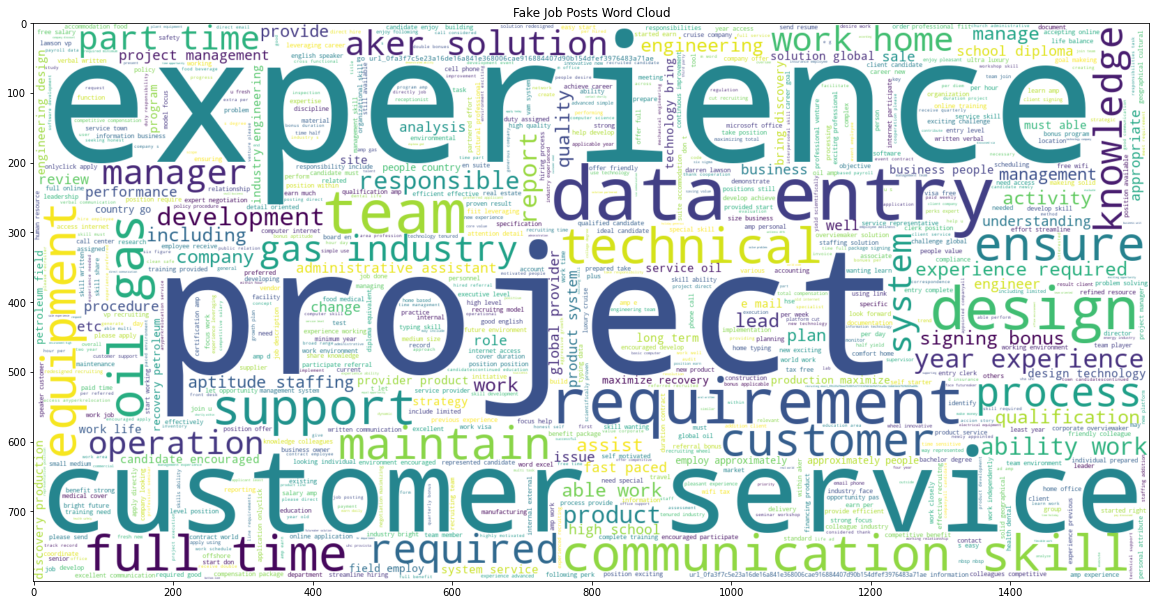

In [60]:
# Create a word cloud of words in fake posts
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(fake_text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.title("Fake Job Posts Word Cloud")
plt.show()

In [24]:
# Create a list of of the top 100 words used in real posts. Display 20 of them.
vectorizer = CountVectorizer(max_features=100)
X_real = vectorizer.fit_transform(df.loc[df["fraudulent"] == 0, "text"])
real_words_list = vectorizer.get_feature_names()
real_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_real.toarray(), columns=real_words_list).sum(axis=0).sort_values(ascending=False).head(20)

experience     39463
team           37411
work           36770
company        28299
service        28154
customer       25894
business       23814
we             20505
client         19663
product        19147
new            17446
year           17100
management     16215
skill          16008
development    15945
sale           15656
time           15625
working        15584
amp            15459
job            14317
dtype: int64

In [25]:
# Create a list of of the top 100 words used in fake posts. Display 20 of them.
vectorizer = CountVectorizer(max_features=100)
X_fake = vectorizer.fit_transform(df.loc[df["fraudulent"] == 1, "text"])
fake_words_list = vectorizer.get_feature_names()
fake_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_fake.toarray(), columns=fake_words_list).sum(axis=0).sort_values(ascending=False).head(20)

work           1829
experience     1610
service        1287
amp            1154
skill          1112
customer       1046
company         963
team            943
product         904
time            865
position        856
project         821
business        773
management      730
system          707
ability         688
year            676
data            651
engineering     633
industry        612
dtype: int64

In [26]:
# Display the top 100 words that are used in real posts and NOT in fake posts
pd.DataFrame(real_words_set.difference(fake_words_set), columns=["Real words"])

,Real words
0,build
1,growing
2,developer
3,want
4,you
5,digital
6,life
7,brand
8,also
9,based


In [27]:
# Display the top 100 words that are used in fake posts and NOT in real posts
pd.DataFrame(fake_words_set.difference(real_words_set), columns=["Fake Words"])

,Fake Words
0,gas
1,requirement
2,responsibility
3,contract
4,administrative
5,responsible
6,equipment
7,perform
8,engineer
9,duty
